# Assignment 

- With task3
- Using neural network aka deep learning 


In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
import pickle
import numpy as np 
import pandas as pd 

In [4]:

#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
# for evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2)-Loading data

In [7]:
df = pd.read_csv('test_data.csv')
df.head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
1,14,6.33,NaN,7,130.0,1.0,2,1,624,2
2,14,6.32,20.7,7,130.0,1.0,2,1,624,2
3,14,5.92,20.2,7,130.0,0.0,2,1,624,2
4,14,6.13,20.4,7,130.0,1.0,2,1,624,2


In [8]:
df.shape

(1784, 10)

# 3)- Exploring data

### 3.1)- Data type

In [9]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
dul,int64
led_type_id,int64
nutrients_id,int64
plant_id,int64
plug_density_m2,int64
substrate_id,int64
fresh_weight_plug,float64
leaf_length,float64
light_distribution_id,float64
marketable,float64


### 3.2)-Checking categorical variables

In [10]:
# Checking unique categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

There is none marked as categorical varible. I was hoping "marketable" but, it is already converted to numerical values. Still we cannot assume it to be a numerical variable. As 1 is not greater than 0.

### 3.3)-Data Description

In [11]:
df.describe()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
count,1784.000000,1596.000000,1426.000000,1784.000000,1687.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,18.784753,6.895294,19.058282,1.512892,192.193242,0.700673,2.818386,1.994395,791.690583,9.950673
std,2.834898,1.149987,2.839304,1.756919,32.994886,0.458092,0.385634,0.815561,132.569002,4.756296
min,14.000000,5.000000,10.000000,1.000000,130.000000,0.000000,2.000000,1.000000,624.000000,2.000000
25%,16.750000,6.077500,17.000000,1.000000,170.000000,0.000000,3.000000,1.000000,633.000000,4.000000
50%,18.000000,6.580000,18.400000,1.000000,170.000000,1.000000,3.000000,2.000000,849.000000,13.000000
75%,20.000000,7.380000,20.400000,1.000000,230.000000,1.000000,3.000000,3.000000,849.000000,13.000000
max,24.000000,13.760000,29.200000,8.000000,230.000000,1.000000,3.000000,3.000000,1050.000000,13.000000


It shows max and min values. There we can see mean values and we can find that some values have very high distribution considering their mean value and standard dev.

### 3.4)-Sorting

In [12]:
df.sort_values(by='leaf_length', ascending=False).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
496,20,8.30,29.2,8,170.0,0.0,3,1,624,2
223,19,10.96,28.6,7,130.0,1.0,2,2,624,2
514,20,9.62,28.5,1,170.0,0.0,3,2,624,2
502,20,8.11,28.5,8,170.0,0.0,3,1,624,2
245,19,NaN,28.4,1,230.0,1.0,2,1,624,2


In [13]:
df.sort_values(by=['leaf_length', 'plant_id'], ascending=[True, False]).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
227,19,5.00,10.0,7,130.0,1.0,2,2,624,2
787,17,5.82,14.6,1,230.0,0.0,3,3,947,13
598,16,5.63,14.8,1,230.0,0.0,3,3,849,13
789,17,5.74,14.8,1,230.0,0.0,3,3,947,13
785,17,5.88,14.9,1,NaN,0.0,3,3,947,13


In [14]:
df.sort_values(by=['leaf_length','marketable'], ascending=[True, False]).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
227,19,5.00,10.0,7,130.0,1.0,2,2,624,2
787,17,5.82,14.6,1,230.0,0.0,3,3,947,13
598,16,5.63,14.8,1,230.0,0.0,3,3,849,13
789,17,5.74,14.8,1,230.0,0.0,3,3,947,13
785,17,5.88,14.9,1,NaN,0.0,3,3,947,13


### 3.5)- Correlation

In [15]:
data_corrs = df.corr()

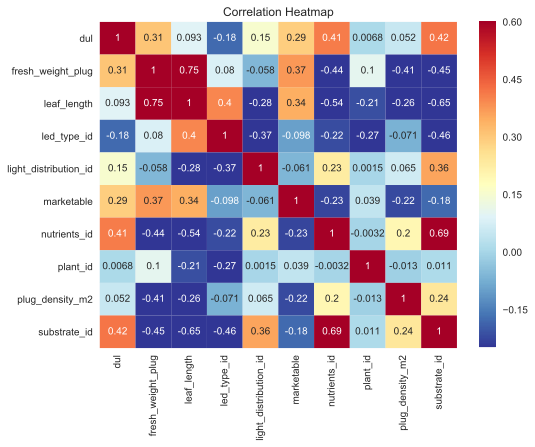

In [16]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

We will come to this when we make comparison with dependant variable

For now, we can see that fresh_weight_plug and leaf length have higher relation. Perhaps they are very close in explaining effect of each other. We can make big conclusion about it now. for now, let's keep it an assumption

### 3.6)- Missing values

In [17]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [18]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'dul': 0,
 'fresh_weight_plug': 188,
 'leaf_length': 358,
 'led_type_id': 0,
 'light_distribution_id': 97,
 'marketable': 0,
 'nutrients_id': 0,
 'plant_id': 0,
 'plug_density_m2': 0,
 'substrate_id': 0}

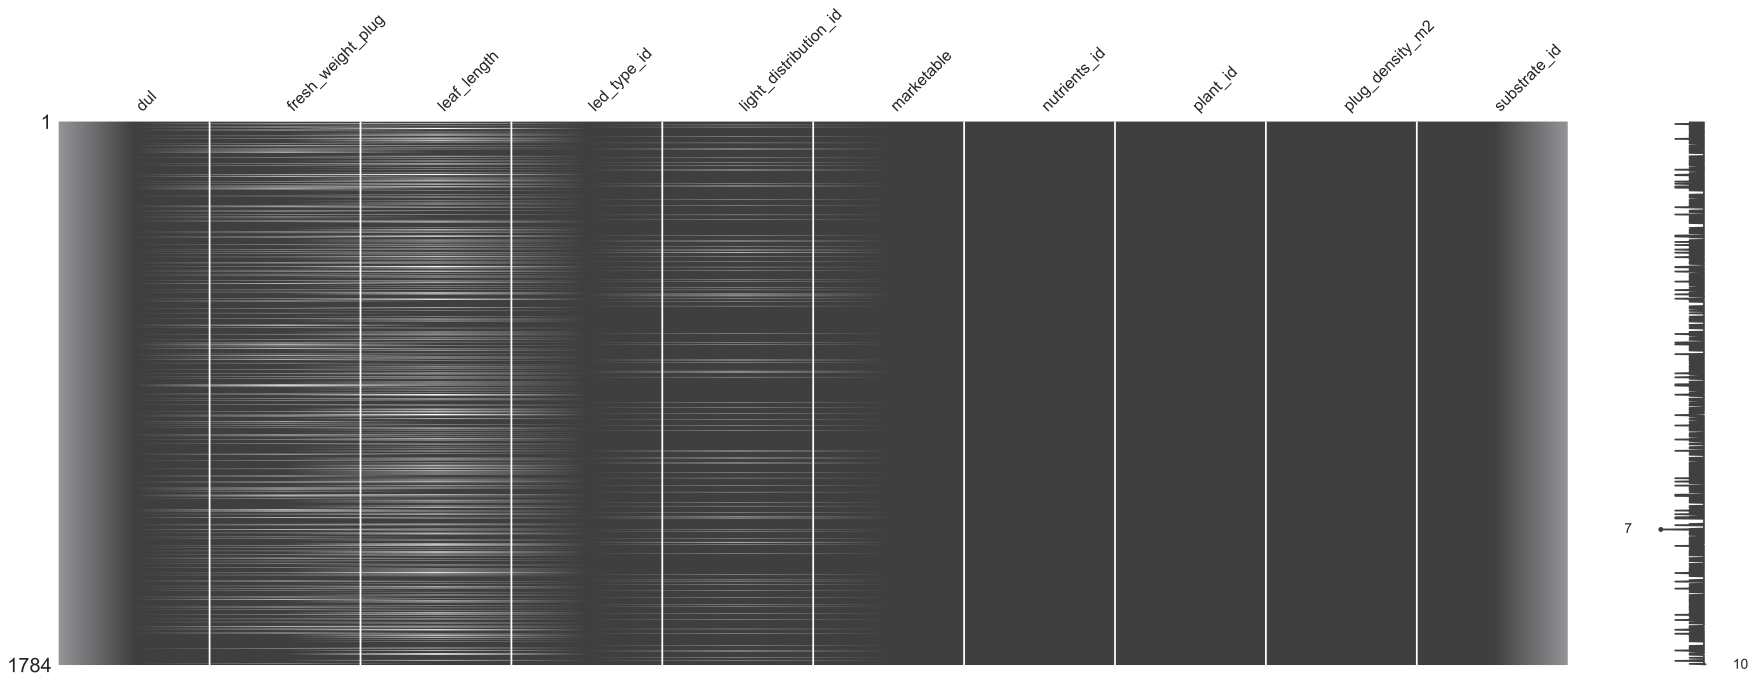

In [19]:
import missingno
missingno.matrix(df, figsize = (30,10))

We have couple of missing values there as we can see clearly. Either we remove them or we ignore them.

another option is to use imputation. We might use that.

Our dependant varibles have no missing values. So, this solution will work

### 3.6.1)- Impute missing values

In [20]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df)

C:\Users\69785hsh\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [21]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'dul': 0,
 'fresh_weight_plug': 188,
 'leaf_length': 358,
 'led_type_id': 0,
 'light_distribution_id': 97,
 'marketable': 0,
 'nutrients_id': 0,
 'plant_id': 0,
 'plug_density_m2': 0,
 'substrate_id': 0}

In [22]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(df)

No. of fields:  1784
No. of missing fields:  3


,No. of mising Value,%age of missing Value
leaf_length,358,20.1
fresh_weight_plug,188,10.5
light_distribution_id,97,5.4


We still have missing values. Perhaps they are in form of some numerical or 0 . That's why NaN cannot detect them

In [23]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [24]:
summary_missing(df)

No. of fields:  1784
No. of missing fields:  3


,No. of mising Value,%age of missing Value
leaf_length,358,20.1
fresh_weight_plug,188,10.5
light_distribution_id,97,5.4


No change yet

In [25]:
df.loc[df.isnull().sum()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
188,16,7.22,20.0,1,130.0,1.0,2,3,849,4
358,16,7.09,21.8,1,170.0,1.0,3,2,849,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
97,14,NaN,17.6,1,170.0,1.0,2,3,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2


In [26]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')
imp_mean.fit(df)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [27]:
summary_missing(df)

No. of fields:  1784
No. of missing fields:  3


,No. of mising Value,%age of missing Value
leaf_length,358,20.1
fresh_weight_plug,188,10.5
light_distribution_id,97,5.4


### Other attempts

Remove em

In [28]:
df.isnull().head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
0,False,True,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()

dul                        0
fresh_weight_plug        188
leaf_length              358
led_type_id                0
light_distribution_id     97
marketable                 0
nutrients_id               0
plant_id                   0
plug_density_m2            0
substrate_id               0
dtype: int64

In [30]:
df.shape

(1784, 10)

In [31]:
df=df.dropna(subset=['fresh_weight_plug','leaf_length','light_distribution_id'],how='any')

In [32]:
df.shape

(1201, 10)

### 3.7)- Duplicate values

In [33]:
df.duplicated()

2       False
3       False
4       False
5       False
7       False
10      False
11      False
13      False
15      False
16      False
18      False
21      False
26      False
28      False
29      False
31      False
32      False
33      False
34      False
36      False
37      False
38      False
39      False
41      False
42      False
43      False
47      False
49      False
51      False
52      False
        ...  
1750    False
1751    False
1752    False
1753    False
1754    False
1755    False
1756    False
1757    False
1758    False
1760    False
1761    False
1762    False
1763    False
1764    False
1765    False
1766    False
1768    False
1770    False
1771    False
1772    False
1773    False
1774    False
1775    False
1776    False
1777    False
1778    False
1780    False
1781    False
1782    False
1783    False
Length: 1201, dtype: bool

In [34]:
df.duplicated().sum()

1

 We have four duplicate values as well. Let's see what are they

In [35]:
df.loc[df.duplicated()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
1017,18,6.12,17.4,1,170.0,1.0,3,2,849,13


### 3.7.1- Drop duplicate values

Only features leaf_length and fresh_weight_plug have duplicate issue

In [36]:
df.drop([1017], axis=0, inplace=True)

In [37]:
df.shape

(1200, 10)

In [38]:
df.loc[df.duplicated()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id


No duplicate there

### 3.8)-Finding Outliers

In [39]:
df.describe()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,18.857500,6.886650,19.059008,1.513333,192.083333,0.700833,2.823333,1.974167,791.290000,10.050000
std,2.845571,1.146208,2.837877,1.757098,32.937777,0.458084,0.381545,0.823041,133.233436,4.701161
min,14.000000,5.000000,10.000000,1.000000,130.000000,0.000000,2.000000,1.000000,624.000000,2.000000
25%,17.000000,6.060000,17.000000,1.000000,170.000000,0.000000,3.000000,1.000000,633.000000,4.000000
50%,19.000000,6.580000,18.400000,1.000000,170.000000,1.000000,3.000000,2.000000,849.000000,13.000000
75%,20.000000,7.372500,20.400000,1.000000,230.000000,1.000000,3.000000,3.000000,849.000000,13.000000
max,24.000000,12.520000,29.200000,8.000000,230.000000,1.000000,3.000000,3.000000,1050.000000,13.000000


In [40]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with FLAG_MOBIL variable
x = _zoom_3sigma('light_distribution_id', df, df)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 93.27
High value: 290.90


Solution is to normalize data . We ll do it later just before modeling

# 4)- Working with dependant variable

### For task 3 i.e marketable or not

In [41]:
df.marketable.value_counts()

1.0    841
0.0    359
Name: marketable, dtype: int64

In [42]:
n_group = df['marketable'].value_counts()
n_group_sum = n_group.sum()

print('Marketable: {}'.format(n_group[0]))
print('Not-Marketable: {}'.format(n_group[1]))

print('percentage of Marketable: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('percentage of Not-Marketable: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

Marketable: 359
Not-Marketable: 841
percentage of Marketable: 29.92 %
percentage of Not-Marketable: 70.08 %


There is a class imbalance as we have more not-marketable items

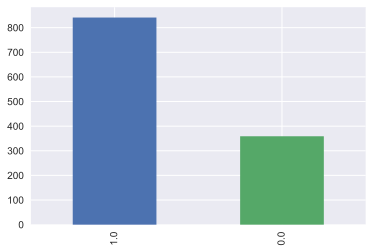

In [43]:
df['marketable'].value_counts().plot.bar()

### correlation among varibles

In [44]:
#correlations with the label feature and sort
correlations = df.corr()['marketable'].sort_values()

In [45]:
print('Most Positive Correlations:\n', correlations.tail(5))

Most Positive Correlations:
 plant_id             0.048061
dul                  0.298701
leaf_length          0.331808
fresh_weight_plug    0.374408
marketable           1.000000
Name: marketable, dtype: float64


In [46]:
print('\nMost Negative Correlations:\n', correlations.head(5))


Most Negative Correlations:
 plug_density_m2         -0.241603
nutrients_id            -0.216755
substrate_id            -0.161130
led_type_id             -0.124046
light_distribution_id   -0.048206
Name: marketable, dtype: float64


#  5)-Task 3- predict if the product is marketable or not 

In [47]:
y=df.marketable

In [48]:
X=df.drop(['marketable'], axis=1)

In [49]:
print(y.shape)
print(X.shape)

(1200,)
(1200, 9)


In [50]:
y.value_counts()

1.0    841
0.0    359
Name: marketable, dtype: int64

### 5.1)- Normalize data

This will solve problem of outliers as well

In [51]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [52]:
X_scaled

array([[-1.70775042, -0.49457531,  0.57848725, ..., -1.18411155,
        -1.25613924, -1.71305679],
       [-1.70775042, -0.84369757,  0.40222576, ..., -1.18411155,
        -1.25613924, -1.71305679],
       [-1.70775042, -0.66040838,  0.47273036, ..., -1.18411155,
        -1.25613924, -1.71305679],
       ...,
       [ 1.80794782,  0.16875697,  0.0849551 , ...,  1.24691302,
         1.16918789,  0.62776615],
       [ 1.80794782,  0.31713393,  0.0497028 , ...,  1.24691302,
         1.16918789,  0.62776615],
       [ 1.80794782,  0.01165196, -0.30282016, ...,  1.24691302,
         1.16918789,  0.62776615]])

### 5.2)- Train and Test split

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 9)
(240, 9)
(960,)
(240,)


# 6)- Model Building

Hand-made Neural network

In [55]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # TODO: Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # TODO: Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
        # TODO: Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

In [56]:
from sklearn import metrics
### Set the hyperparameters here ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

print(metrics.accuracy_score(y_test,y_pred[0]))

print(metrics.recall_score(y_test,y_pred[0]))

0.7083333333333334
0.6111111111111112


We have taken accuracy and recall. These two evaluation matrices are very common in literature

Neural network seems to perform better than our traditional machine learning models. Yet we need to make more checking in this

# 6b)-Neural Network using Tensorflow

In [58]:
import tensorflow as tf
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions_tf = list(classifier.predict(X_test, as_iterable=True))
tf_score = metrics.recall_score(y_test, predictions_tf)
tf_acc = metrics.accuracy_score(y_test, predictions_tf)

AttributeError: module 'pandas' has no attribute 'rolling_count'

**Thanks for updates in tensorflow, I am getting these error. I have no time to enjoy removing these errors. so, I ll apply Keras**

In [61]:
#print('TF Recall Score: ', tf_score)
#print('TF Accuracy Score: ', tf_acc)

# 6c)-Dense Neural Network

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [63]:
X_train.shape[1]

9

In [64]:
#create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

In [65]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


In [67]:
# call the function to fit to the data (training the network)
history=model.fit(X_train, y_train, epochs = 20, batch_size=20, validation_data=(X_test, y_test))

Train on 960 samples, validate on 240 samples
Epoch 1/20
960/960 [==============================] - 0s 292us/step - loss: 0.6373 - acc: 0.6396 - val_loss: 0.5911 - val_acc: 0.6375
Epoch 2/20
960/960 [==============================] - 0s 33us/step - loss: 0.5541 - acc: 0.7062 - val_loss: 0.5001 - val_acc: 0.8250
Epoch 3/20
960/960 [==============================] - 0s 35us/step - loss: 0.4671 - acc: 0.8094 - val_loss: 0.4084 - val_acc: 0.8542
Epoch 4/20
960/960 [==============================] - 0s 33us/step - loss: 0.4154 - acc: 0.8260 - val_loss: 0.3545 - val_acc: 0.8792
Epoch 5/20
960/960 [==============================] - 0s 33us/step - loss: 0.3654 - acc: 0.8521 - val_loss: 0.3223 - val_acc: 0.9000
Epoch 6/20
960/960 [==============================] - 0s 33us/step - loss: 0.3432 - acc: 0.8573 - val_loss: 0.3034 - val_acc: 0.9000
Epoch 7/20
960/960 [==============================] - 0s 35us/step - loss: 0.3310 - acc: 0.8792 - val_loss: 0.2872 - val_acc: 0.9083
Epoch 8/20
960/960 [==

In [68]:
y_pred_keras = model.predict(X_test)

In [69]:
y_pred_keras[:5]

array([[0.95765615],
       [0.22054863],
       [0.9777197 ],
       [0.95499545],
       [0.11985743]], dtype=float32)

In [70]:
#convert in crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)

# 7)- Model Evaluation

### i)- Accuracy Results

In [71]:
print(recall_score(y_test, yhat_class_keras))
print(accuracy_score(y_test, yhat_class_keras))

0.9567901234567902
0.9333333333333333


We have seen a mighty improvement. As I am more learned in tensorflow. so, our hand made model could not perform that well. This model is giving great results. 

**From 70% to now 93%**. This is awesome. I won't lie. Maybe I need to recheck or tune my hand made tensorflow. I will settle for winner results due to time limitation.

In [72]:
keras_score = recall_score(y_test, yhat_class_keras)
keras_acc = accuracy_score(y_test, yhat_class_keras)

### ii)- Classification Report

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, yhat_class_keras))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90        78
         1.0       0.95      0.96      0.95       162

   micro avg       0.93      0.93      0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.93       240



### iii)- Plotting results

In [74]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

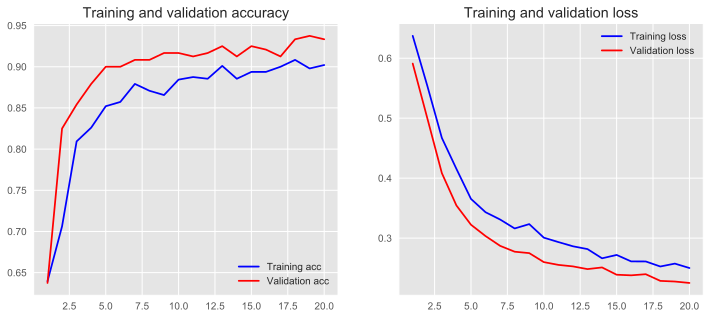

In [75]:
plot_history(history)

### iv)-Confusion Matrix

In [76]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [77]:
print(confusion_matrix(y_test, yhat_class_keras))

[[ 69   9]
 [  7 155]]


In [78]:
cm = confusion_matrix(y_test, yhat_class_keras)
cm

array([[ 69,   9],
       [  7, 155]], dtype=int64)

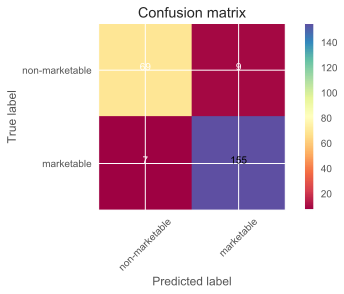

In [79]:
# False=0; True=1 ====> non-marketable=0, marketable=1
plot_confusion_matrix(cm, classes=['non-marketable', 'marketable'])

# 8)- Matrics evaluation

### a)-Null accuracy

accuracy that could be achieved by always predicting the most frequent class

In [80]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1.0    162
0.0     78
Name: marketable, dtype: int64

In [81]:
# calculate the percentage of ones
y_test.mean()

0.675

In [82]:
# calculate the percentage of zeros
1 - y_test.mean()

0.32499999999999996

In [83]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.675

So, a rough model will have accuracy of 67%

### b)-Classification Accuracy
Overall, how often is the classifier correct?

In [84]:
print(accuracy_score(y_test, yhat_class_keras))

0.9333333333333333


In [86]:
#save confusion matrix and slice into four piece
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [87]:
print((TP + TN) / float(TP + TN + FP + FN))

0.9333333333333333


So our model has made an improvement as of null accuracy was 67%. We got a good result of 93%

### c)-Classification Error
Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate

In [89]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, yhat_class_keras))

0.06666666666666667
0.06666666666666665


### d)-Other matrices

- Sensitivity
- Specificity
- False Positive Rate
- Precision

#### Sensitivity
When the actual value is positive, how often is the prediction correct?

How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Recall"

In [90]:
print(recall_score(y_test, yhat_class_keras))

0.9567901234567902


In [91]:
print(TP / float(TP + FN))

0.9567901234567902


#### Specificity
When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting positive instances?

In [92]:
# No sklearn formula

print(TN / float(TN + FP))

0.8846153846153846


#### False Positive Rate
When the actual value is negative, how often is the prediction incorrect?

In [93]:
print(FP / float(TN + FP))

0.11538461538461539


#### Precision
When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [94]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, yhat_class_keras))

0.9451219512195121
0.9451219512195121
